## BIKE SHARE ANALYSIS

How does a bike - share navigate speedy success?

### ABOUT THE COMPANY

Founded in 2016, Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. In addition to offering traditional bikes, the company also has reclining bikes, hand tricycles, and cargo bikes included in its renting options. They can be unlocked from one station and returned to any other station in the system anytime.

Cyclistic has flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders while customers who purchase annual memberships are known as members.

The company's finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps the company attract more customers, Lily Moreno – Cyclistic's marketing director – believes that maximizing the number of annual members will be key to future growth. Instead of creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

### BUSINESS TASK

Analyzing the company’s historical bike trip data to identify trends into how annual members and casual riders use Cyclistic bikes differently.

- How do annual members and casual riders use Cyclistic bikes differently?

Begin the data processing by loading the data sets first. Then data exploration is done to get an overview of the datasets, and cleaning the data

#### Loading the libraries

In [1]:
#import libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter

import datetime

from pandas.api.types import CategoricalDtype

import seaborn as sns

#### Loading datasets

In [2]:
june_2021_tripdata = pd.read_csv('202106-divvy-tripdata.csv')
july_2021_tripdata = pd.read_csv('202107-divvy-tripdata.csv')
aug_2021_tripdata = pd.read_csv('202108-divvy-tripdata.csv')
sep_2021_tripdata = pd.read_csv('202109-divvy-tripdata.csv')
oct_2021_tripdata = pd.read_csv('202110-divvy-tripdata.csv')
nov_2021_tripdata = pd.read_csv('202111-divvy-tripdata.csv')
dec_2021_tripdata = pd.read_csv('202112-divvy-tripdata.csv')
jan_2022_tripdata = pd.read_csv('202201-divvy-tripdata.csv')
feb_2022_tripdata = pd.read_csv('202202-divvy-tripdata.csv')
mar_2022_tripdata = pd.read_csv('202203-divvy-tripdata.csv')
apr_2022_tripdata = pd.read_csv('202204-divvy-tripdata.csv')
may_2022_tripdata = pd.read_csv('202205-divvy-tripdata.csv')

#### Overview of data

In [3]:
june_2021_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [4]:
june_2021_tripdata.shape

(729595, 13)

In [5]:
may_2022_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


In [6]:
may_2022_tripdata.shape

(634858, 13)

It is clear that all the datasets contains same columns. Since there are 12 datasets, it is a good idea to combine them by using **concat()** function. It performs same function as Union operation in SQL

In [7]:
tripdata = pd.concat([june_2021_tripdata, july_2021_tripdata, aug_2021_tripdata, sep_2021_tripdata, oct_2021_tripdata, nov_2021_tripdata, dec_2021_tripdata, jan_2022_tripdata, feb_2022_tripdata, mar_2022_tripdata, apr_2022_tripdata, may_2022_tripdata])

In [8]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [9]:
tripdata.shape

(5860776, 13)

In [10]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 634857
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 626.0+ MB


### Taking a closer look at the dataset

In [11]:
#unique rides in total

tripdata.ride_id.nunique()

5860776

In [12]:
#types of bikes 
tripdata.rideable_type.nunique()

3

### Cleaning the dataset

In [13]:
#checking for null values
tripdata.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [14]:
#total null values 
tripdata.isnull().values.sum()


3413079

From the above analysis, it is clear that start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng has null values.

Since these columns won't be used in the analysis, instead of dropping the null values, these columns can be discarded.

In [15]:
to_be_dropped = ['start_station_name',
           'start_station_id',
           'end_station_name',
           'end_station_id',
           'start_lat',
           'start_lng',
           'end_lat',
           'end_lng']

tripdata.drop(to_be_dropped, inplace = True, axis = 1)

In [16]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,member


#### Looking for duplicate values

In [17]:
tripdata.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
634853    False
634854    False
634855    False
634856    False
634857    False
Length: 5860776, dtype: bool

No duplicates rows are found

In [18]:
tripdata.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

We can see that the columns are of object data type. We need to change the data type from object to datetime for analysis 

Let's change the data types of started_at and ended_at 

In [19]:
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'])

tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'])

In [20]:
tripdata.dtypes

ride_id                  object
rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
member_casual            object
dtype: object

### Creating hour, day and month column

In [21]:
#hour transformation
tripdata['hour'] = tripdata['started_at'].dt.hour
tripdata = tripdata.astype({'hour':'int8'})

#day transformation
tripdata['dayofweek'] = tripdata['started_at'].dt.day_name()

#month transformation
tripdata['month'] = tripdata['started_at'].dt.month_name()

### Create Ride Length Column

This column will show the ride length in minutes for each ride

In [22]:
tripdata['ride_length'] = (tripdata['ended_at'] - tripdata['started_at']) / datetime.timedelta(minutes=1)
tripdata['ride_length'] = tripdata['ride_length'].astype('int32')

### Removing Outliers

Check if any rows have zero or negative values in the ride_length column and remove them if any 

In [23]:
tripdata[tripdata['ride_length'] <= 0].count()

ride_id          95907
rideable_type    95907
started_at       95907
ended_at         95907
member_casual    95907
hour             95907
dayofweek        95907
month            95907
ride_length      95907
dtype: int64

In [24]:
#Remove rows with zero or negative values 
tripdata = tripdata.drop(tripdata[tripdata.ride_length <= 0].index)

In [25]:
tripdata.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual',
       'hour', 'dayofweek', 'month', 'ride_length'],
      dtype='object')

In [26]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112835 entries, 0 to 634857
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   hour           int8          
 6   dayofweek      object        
 7   month          object        
 8   ride_length    int32         
dtypes: datetime64[ns](2), int32(1), int8(1), object(5)
memory usage: 336.4+ MB


In [27]:
tripdata.isnull().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
hour             0
dayofweek        0
month            0
ride_length      0
dtype: int64

In [28]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,dayofweek,month,ride_length
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,member,14,Sunday,June,2
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,member,11,Friday,June,6
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,member,9,Friday,June,5
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,member,19,Thursday,June,25
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,member,14,Friday,June,4


In [29]:
tripdata.shape

(5112835, 9)

We will now take a closer look at more specific information surrounding our dataframe. Since our business task is to find out how casual riders and members are using Cyclistic bikes differently, we are going to filter the data and create some pivot tables to compare the numbers from the two types of customers

#### Rides by Customer Type

In [30]:
df = tripdata.groupby('member_casual', as_index=True)[['ride_id']].count()
df

,ride_id
member_casual,
casual,2249557
member,2863278


#### Average Ride Length

In [31]:
avg_ride_length = tripdata.groupby('member_casual', as_index=True)[['ride_length']].mean()

avg_ride_length

,ride_length
member_casual,
casual,30.620270
member,12.803352


#### Polular Ride Type 

In [32]:
#create pivot table to summarize popular ride type 

rt_pivot = pd.pivot_table(tripdata, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'], margins=True, margins_name='total count')
rt_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1090678
              member         1719429
docked_bike   casual          242772
electric_bike casual          916107
              member         1143849
total count                  5112835

#### Most Popular Day of the Week for Bike Rentals


In [33]:
pdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pdw_pivot

count
                           ride_id
dayofweek   member_casual         
Friday      casual          316783
            member          398903
Monday      casual          264959
            member          403819
Saturday    casual          480230
            member          383102
Sunday      casual          413096
            member          342549
Thursday    casual          271425
            member          435566
Tuesday     casual          251972
            member          454890
Wednesday   casual          251092
            member          444449
total count                5112835

#### Most Popular Month for Bike Rentals

In [34]:
pm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual          108240
            member          207778
August      casual          366194
            member          348534
December    casual           58516
            member          149008
February    casual           17293
            member           76404
January     casual           15029
            member           69300
July        casual          395525
            member          336343
June        casual          327654
            member          316012
March       casual           75688
            member          162877
May         casual          246430
            member          309436
November    casual           91356
            member          214282
October     casual          225101
            member          327514
September   casual          322531
            member          345790
total count                5112835

#### Average Ride Length by Day of the Week

In [35]:
rdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rdw_pivot

mean
                                     ride_length
dayofweek              member_casual            
Friday                 casual          28.918411
                       member          12.531894
Monday                 casual          30.597160
                       member          12.406764
Saturday               casual          33.654451
                       member          14.441517
Sunday                 casual          35.600321
                       member          14.613982
Thursday               casual          27.695857
                       member          12.170507
Tuesday                casual          26.216405
                       member          12.001651
Wednesday              casual          26.376041
                       member          12.040506
total ride_length mean                 20.642481

#### Average Ride Length by Month

In [36]:
rlm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rlm_pivot

mean
                                     ride_length
month                  member_casual            
April                  casual          29.804222
                       member          11.231569
August                 casual          28.692330
                       member          13.807895
December               casual          23.581721
                       member          10.673460
February               casual          26.276008
                       member          11.128933
January                casual          28.332823
                       member          11.706825
July                   casual          32.904266
                       member          14.006963
June                   casual          37.332915
                       member          14.458672
March                  casual          33.011019
                       member          11.681606
May                    casual          30.851812
                       member          13.114570
November               casual          23.379526
                       member          11.006547
October                casual          28.871547
                       member          12.225777
September              casual          27.612843
                       member          13.469716
total ride_length mean                 20.642481

#### Total Number of Rides per Hour

In [37]:
tnr_pivot = pd.pivot_table(tripdata, index=['hour', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total ride_id count')
tnr_pivot

count
                                   ride_id
hour                member_casual         
0                   casual           47207
                    member           30648
1                   casual           33793
                    member           20253
2                   casual           23037
                    member           11804
3                   casual           12929
                    member            7034
4                   casual            8948
                    member            7921
5                   casual           11714
                    member           28728
6                   casual           24171
                    member           76661
7                   casual           44743
                    member          145460
8                   casual           60491
                    member          171150
9                   casual           69439
                    member          124280
10                  casual           93420
                    member          119379
11                  casual          120906
                    member          143277
12                  casual          141956
                    member          165092
13                  casual          150776
                    member          161771
14                  casual          155436
                    member          158351
15                  casual          166413
                    member          184849
16                  casual          181815
                    member          241659
17                  casual          209009
                    member          298590
18                  casual          190309
                    member          249173
19                  casual          148479
                    member          179437
20                  casual          108965
                    member          122992
21                  casual           93134
                    member           94007
22                  casual           86460
                    member           71896
23                  casual           66007
                    member           48866
total ride_id count                5112835

### DATA VISUALIZATION

Now that the analysis has been done, representing the data visually to show the trends to the Stake holders is an important step of whole data analysis cycle

#### Visualization by Users Type

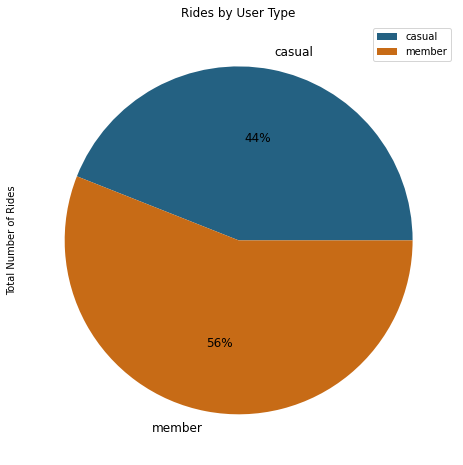

In [38]:
df['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides', title='Rides by User Type', legend=True,
                       autopct='%1.0f%%', fontsize='12', startangle=0, colors=['#246182', '#c76b16'], figsize=(10, 8))
plt.show()

From the Pie chart it is clear that annual members represent the majority of Cyclist bike sharing users, making upto 56% of the total users

#### Visualizing Average Ride Length

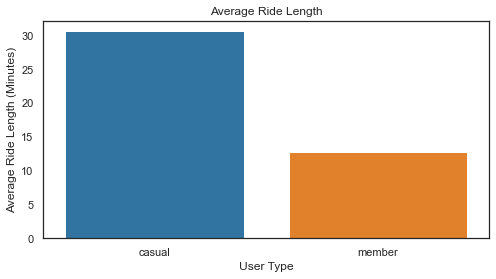

In [39]:
df1 = tripdata[['ride_length', 'member_casual']]
df1 = df1.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize = (8,4))
sns.set_theme(style='white')
sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

The bar chart shows that casual riders have longer ride lengths than Members. The average ride length is 30 minutes for casual riders and 13 minutes for members.

#### Visualizing Popular Rideable Type

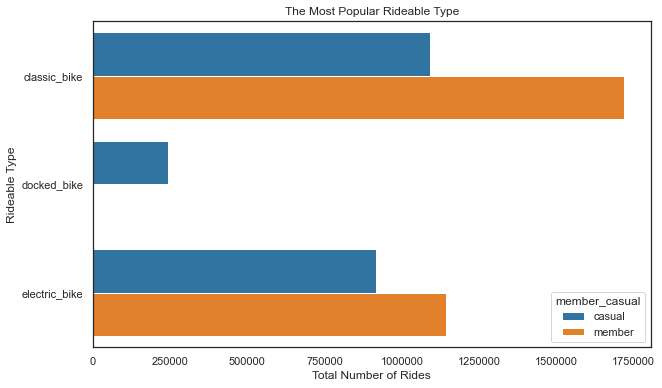

In [40]:
df2 = tripdata[['rideable_type', 'member_casual', 'ride_id']]
df2 = df2.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (10,6))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='tab10', data=df2).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

The Cyclistic bikes are divided into three Rideable types - *classic bike, docked bike and electric bike.

It is clear from the visualization that classic bike is the most rented rideable type by both casual riders and members. 

Docked bike has the least number of Casual riders and it appears that docked bikes are not used or given an access to use.

#### Visualizing most popular Day of Week for Bike rentals

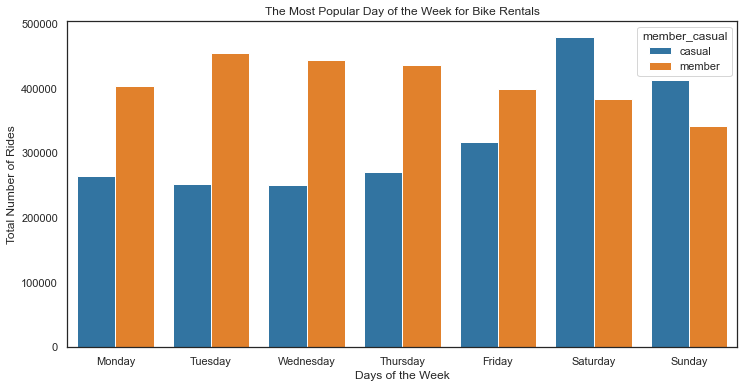

In [41]:
df3 = tripdata[['dayofweek', 'member_casual', 'ride_id']]
df3 = df3.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (12,6))
sns.set_theme(style='white')
sns.barplot(data=df3, x='dayofweek', y='ride_id', hue='member_casual', palette='tab10',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']).set_title('The Most Popular Day of the Week for Bike Rentals')

plt.xlabel('Days of the Week')
plt.ylabel('Total Number of Rides')
plt.show()

When it comes to rentals by day of the week, there are similarities and differences between casual and members. Saturday is the most popular day for casual riders and Tuesday is the most popular day for Members.
It appears that Casual riders rent the bike more on Weekends than on weekdays and Members rent the bike more on the weekdays than on weekends.

#### Visualizing most popular Month of the year for Bike Rentals

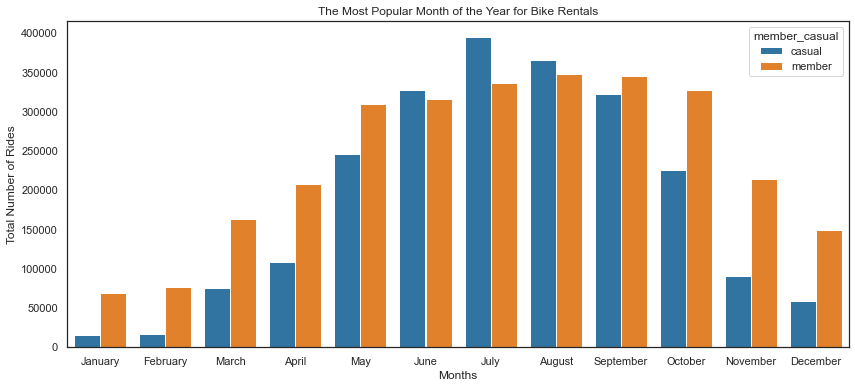

In [42]:
df4 = tripdata[['month', 'member_casual', 'ride_id']]
df4 = df4.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (14,6))
sns.set_theme(style='white')
sns.barplot(data=df4, x='month', y='ride_id', hue='member_casual', palette='tab10', 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('The Most Popular Month of the Year for Bike Rentals'),

plt.xlabel('Months')
plt.ylabel('Total Number of Rides')
plt.show()

It is possible to analyze the seasonal effect on the business. From the above visualization renting increases in Summer months and decreases gradually during the winter months.  
But the members are consistent throughout the year compared to casual riders.

#### Visualizing Average ride length by Day of the week

Let's plot a continous line chart to notice the trend 

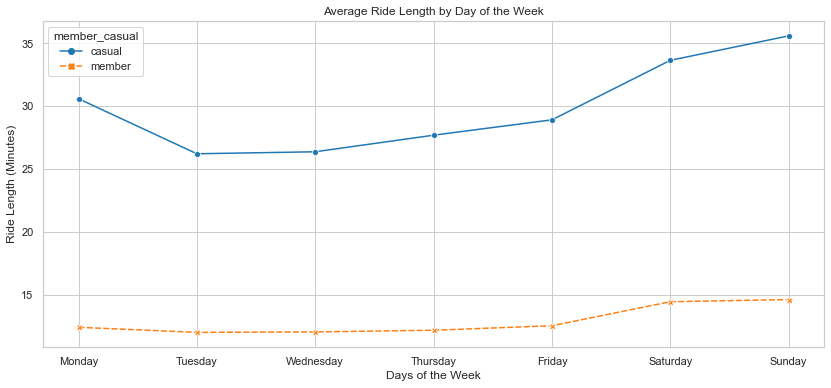

In [43]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['dayofweek'] = tripdata['dayofweek'].astype(cat_type)
df5 = tripdata.copy()

df5 = tripdata[['dayofweek', 'member_casual', 'ride_length']]
df5 = df5.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df5, x='dayofweek', y='ride_length', hue='member_casual', style='member_casual', palette='tab10', 
             markers=True).set_title('Average Ride Length by Day of the Week')

plt.xlabel('Days of the Week')
plt.ylabel('Ride Length (Minutes)')
plt.show()

From the line plot it is clear that ride length increases on the weekends for the two groups. The difference between casual riders and members lies in the duration of rides.

Considering the lack of personal user data for privacy reasons, it is difficult to determine what exactly is causing casual riders and members to have big difference in riding lengths. 

It is likely that members live close to work/school and choose to commute using Cyclistic bike sharing system. If we take casual riders into consideration , they probably buy single ride or full day pass adnd use it for long ride lengths in case of tourism. 
However the trend is infact hard to explain.

#### Visualizing Average Ride length by Month

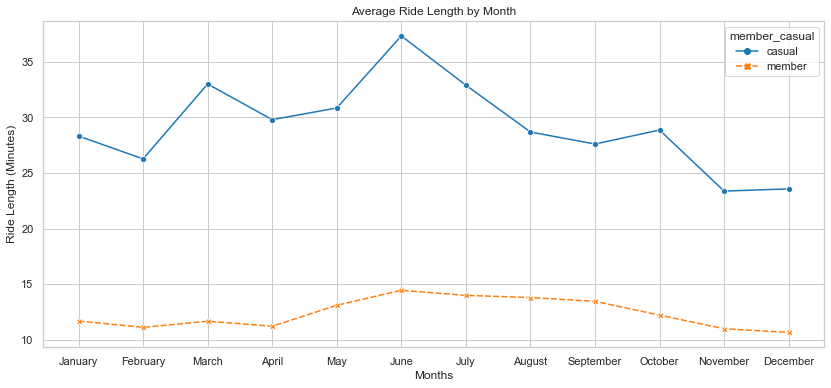

In [44]:
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['month'] = tripdata['month'].astype(cat_type)
df6 = tripdata.copy()

df6 = tripdata[['month', 'member_casual', 'ride_length']]
df6 = df6.groupby(['month', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df6, x='month', y='ride_length', hue='member_casual', palette='tab10', 
             style='member_casual', markers=True).set_title('Average Ride Length by Month')

plt.xlabel('Months')
plt.ylabel('Ride Length (Minutes)')
plt.show()

From the above visualization it can be seen that the ride length changes considerably for casual riders as the months go by.
For this type of customer, the ride length peaks during the summer – reaching an average of 38 minutes in July – before dropping in August. 
As for the members, the ride length does not change drastically over the months, peaking in June – averaging 14 minutes – and then gradually dropping for the remainder of the year.

Considering the short trips, this could indicate that members use Cyclistic's bikes to commute and, perhaps, run errands. The drop in ride length over the winter months could indicate that members choose other means of transportation to commute during that time of the year. In contrast, casual riders could be using it for leisure or tourism – as mentioned earlier – especially during the spring and summer.

#### Visualizing Total number of rides per hour

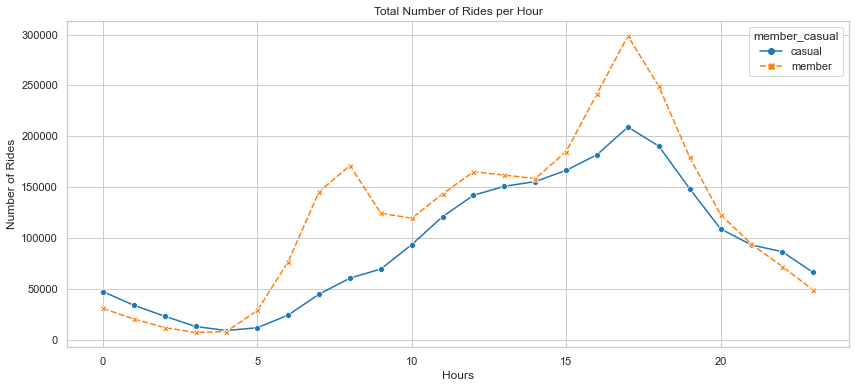

In [45]:
df7 = tripdata[['hour', 'member_casual', 'ride_id']]
df7 = df7.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df7, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.show()

By taking a closer look at the total number of rides per hour, the number of bike rentals by casual riders begins to increase between 7 a.m to 10 a.m peaking at 5pm. 
For members the number starts to go up earlier aroud 6 a.m and also peaking at 5 p.m.
Note that the number of rides by members is far greater than casual riders. This could be related to the fact that members represent the majority of users and likely use Cyclistic's services for their daily commute.


### KEY FINDINGS

- Annual members are majority of users making up 56% of Cyclistic's Customers.

- Casual riders have an average ride length of around 30 minutes, while members take shorter trips , averaging 13 minutes.

- Casual bike is the most popular rideable type and it seems that members don't have an access to Docker bikes or they don't use it at all.

- Saturday is the most popular day for casual riders and Tuesday for Members.

- Both user types take longer rides during the spring and summer months.

- **Casual riders**  tend to rent more bikes on the weekends – especially over the summer. Considering the long average ride length, this combination of factors suggests that this group of customers use the bikes for leisure.

- **Members** tend to use Cyclistic's bike-sharing system on a daily basis for shorter rides, indicating its use for commuting to work/school and running errands on the weekends.

### RECOMMENDATIONS

- Increase marketing campaign targeted at casual riders through email, text messages, and app notifications during the summer months, when bike rental is more frequent. The ads could offer special discounts for the annual membership in order to encourage casual riders to make the switch.

- Provide an access to Docker cycles to Members if it isn't.

- Create a rewards points system for members, where each bike rental adds up a certain number of points to the user’s account. The points could get higher with rental frequency and trip duration, and at the end of each year, the user could exchange the points for a discount on membership renewal.

- Cyclistic could study partnering up with local companies and offer special deals on places such as fitness centers, movie theaters, beauty salons, and restaurants. Focusing on entertainment and wellness segments could motivate casual riders into signing up for the annual membership.

- Given that casual riders do not rent bikes as much as members during the weekdays, Cyclistic’s marketing team should also consider the possibility of creating two new types of membership:

    - An annual membership that only includes the weekends. This way, the customers that only rent bikes twice a week could pay accordingly and still add to the company’s growing number of members.
    - A seasonal membership tailored for the group of people that likes to ride bikes during the summer, but do not have any interest in renting it for the remainder of the year. This type of membership could be billed annually, and offer a special discount in comparison to the single-ride and full-day passes.

### CONSIDERATIONS

Given the fact that we encountered certain gaps in our data, such as the lack of payment, age, gender, and geographical information, we are unable to make further recommendations. Demographic data plays a significant role in creating a successful marketing campaign because it allows businesses to understand their audience better. Once the company has this information, they can segment their customers into separate groups based on their habits, interests, and other important characteristics. This way, the marketing team is able to create customized ad campaigns capable of achieving Cyclistic’s marketing and financial goals.